# APPLIED MACHINE LEARNING ASSIGNMENT 1

Lecturer's Name: Paul <br />
Student Name: Yap Li Xen (Kelvin) <br />
Student ID: P7414389 <br />
Class: DSAI/2021



# PART A: CLASSIFICATION

# Background

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.


One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# Steps

1. xxx
2. xxx
3. xxx

# Importing All Libraries

In [605]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Data Importing

A first view of the dataset to understand the data structure and data value.

In [606]:
df = pd.read_csv('data/train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


![](data/data_description.png)

In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [608]:
#Feature Selection
# df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare', 'Embarked'], 1)
# df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1)
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1)
df.shape

(891, 8)

# Exploratory Data Analysis

In [609]:
# sns.pairplot(df, hue="Survived", height=2)
# plt.show()

In [610]:
# corr = df.corr()
# sns.heatmap(corr, cmap="YlGnBu",annot=True,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values) 
# plt.show()

# Data Preparation

In [611]:
# 1. SibSp & Parch (Regularization (Curse of Dimension)?)
df['hasFamily'] = np.where((df['SibSp'] <= 0) & (df['Parch'] <= 0), 0, 1)
df = df.drop(['SibSp', 'Parch'], 1)
print(df.head())
df.shape

   Survived  Pclass     Sex   Age     Fare Embarked  hasFamily
0         0       3    male  22.0   7.2500        S          1
1         1       1  female  38.0  71.2833        C          1
2         1       3  female  26.0   7.9250        S          0
3         1       1  female  35.0  53.1000        S          1
4         0       3    male  35.0   8.0500        S          0


(891, 7)

In [612]:
# 2. Group Fare
fare_bins=[0,10,20,40,60,80,100,200,600]
fare_labels=[1,2,3,4,5,6,7,8]
df['Fare_Group'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)
df = df.drop('Fare', 1)
print(df.head())
df.shape

   Survived  Pclass     Sex   Age Embarked  hasFamily Fare_Group
0         0       3    male  22.0        S          1          1
1         1       1  female  38.0        C          1          5
2         1       3  female  26.0        S          0          1
3         1       1  female  35.0        S          1          4
4         0       3    male  35.0        S          0          1


(891, 7)

In [613]:
# 3. Age (delete OR group)
df.Age.replace('', np.nan, inplace=True)
df['Age'] = df['Age'].fillna(-1)
# df = df.dropna()

age_bins=[-1,0,3,13,20,60,120]
age_labels=['Unknown','Baby','Children','Teenager','Adult','Elderly']
# age_bins=[0,3,13,20,60,120]
# age_labels=['Baby','Children','Teenager','Adult','Elderly']
# age_labels=[1,2,3,4,5,6]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df = df.drop('Age', 1)
print(df.head())
df.shape

   Survived  Pclass     Sex Embarked  hasFamily Fare_Group Age_Group
0         0       3    male        S          1          1     Adult
1         1       1  female        C          1          5     Adult
2         1       3  female        S          0          1     Adult
3         1       1  female        S          1          4     Adult
4         0       3    male        S          0          1     Adult


(891, 7)

In [614]:
# df.info()

# df.Fare_Group = df.Fare_Group.astype('int64')
# df.Age_Group = df.Age_Group.astype('int64')
# df.info()

# sns.pairplot(df, hue="Survived", height=2)
# plt.show()

In [615]:
# 4. Embarked
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
df = df[df['Embarked'].notna()]
ohe.fit_transform(df["Embarked"].values.reshape(-1,1)).toarray()
print(df.shape)

(889, 7)


In [616]:
# # 5. Sex (Encoding)
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()
# ohe.fit_transform(df["Sex"].values.reshape(-1,1)).toarray()
# print(df.shape)

In [617]:
# 5. Sex (Encoding)
df = pd.get_dummies(df)
df = df.drop('Sex_female', 1)
print(df.head())
df.shape

   Survived  Pclass  hasFamily  Sex_male  Embarked_C  Embarked_Q  Embarked_S  \
0         0       3          1         1           0           0           1   
1         1       1          1         0           1           0           0   
2         1       3          0         0           0           0           1   
3         1       1          1         0           0           0           1   
4         0       3          0         1           0           0           1   

   Fare_Group_1  Fare_Group_2  Fare_Group_3  ...  Fare_Group_5  Fare_Group_6  \
0             1             0             0  ...             0             0   
1             0             0             0  ...             1             0   
2             1             0             0  ...             0             0   
3             0             0             0  ...             0             0   
4             1             0             0  ...             0             0   

   Fare_Group_7  Fare_Group_8  Age_Gro

(889, 21)

In [618]:
# df = pd.get_dummies(df)
# print(df.head())
# df.shape

# Train Test Split Data

In [619]:
from sklearn.model_selection import train_test_split

df.info()
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Survived            889 non-null    int64
 1   Pclass              889 non-null    int64
 2   hasFamily           889 non-null    int32
 3   Sex_male            889 non-null    uint8
 4   Embarked_C          889 non-null    uint8
 5   Embarked_Q          889 non-null    uint8
 6   Embarked_S          889 non-null    uint8
 7   Fare_Group_1        889 non-null    uint8
 8   Fare_Group_2        889 non-null    uint8
 9   Fare_Group_3        889 non-null    uint8
 10  Fare_Group_4        889 non-null    uint8
 11  Fare_Group_5        889 non-null    uint8
 12  Fare_Group_6        889 non-null    uint8
 13  Fare_Group_7        889 non-null    uint8
 14  Fare_Group_8        889 non-null    uint8
 15  Age_Group_Unknown   889 non-null    uint8
 16  Age_Group_Baby      889 non-null    uint8
 1

# Train & Score Model

In [620]:
# import 5 different models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# import different metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Assign 5 models into arrays
models = [LogisticRegression(), 
          KNeighborsClassifier(), 
          GaussianNB(), 
          DecisionTreeClassifier(), 
          SVC(),
          LinearSVC()]

#Loop models and compile score into table
rows = []
for i in models:
    # Fit Training Data to model selected
    model = i
    model.fit(X_train, y_train)
    
    # Predict Train Data
    y_predict_train_data = model.predict(X_train)
    x_train_accuracy_score = accuracy_score(y_train, y_predict_train_data)
    x_train_auc_score = roc_auc_score(y_train, y_predict_train_data)

    # Predict Test Data
    y_predict_test_data = model.predict(X_test)
    x_test_accuracy_score = accuracy_score(y_test, y_predict_test_data)
    x_test_auc_score = roc_auc_score(y_test, y_predict_test_data)

    # Calculate Confusion_Matrix
    cm = confusion_matrix(y_test, y_predict_test_data)

    rows.append([i, 
                 "{:.2f}%".format(x_train_accuracy_score*100), 
                 "{:.2f}%".format(x_test_accuracy_score*100), 
                 "{:.2f}".format(x_train_auc_score), 
                 "{:.2f}".format(x_test_auc_score), 
                 cm])

# Display summary result
summary_table = pd.DataFrame(rows, columns=["Algorithm", 
                                            "accuracy_score(train)", 
                                            "accuracy_score(test)", 
                                            "roc_auc_score(train)", 
                                            "roc_auc_score(test)", 
                                            "Confusion Matrix"])
print(summary_table)

                  Algorithm accuracy_score(train) accuracy_score(test)  \
0      LogisticRegression()                80.03%               75.28%   
1    KNeighborsClassifier()                83.68%               81.46%   
2              GaussianNB()                70.60%               70.79%   
3  DecisionTreeClassifier()                87.90%               80.34%   
4                     SVC()                82.98%               82.02%   
5               LinearSVC()                80.45%               76.97%   

  roc_auc_score(train) roc_auc_score(test)      Confusion Matrix  
0                 0.78                0.76  [[80, 29], [15, 54]]  
1                 0.82                0.81  [[90, 19], [14, 55]]  
2                 0.66                0.67  [[92, 17], [35, 34]]  
3                 0.86                0.79  [[92, 17], [18, 51]]  
4                 0.80                0.81  [[93, 16], [16, 53]]  
5                 0.79                0.77  [[83, 26], [15, 54]]  


# Evaluate Model

In [621]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_predict)
# print(cm)

In [622]:
# from sklearn.metrics import plot_confusion_matrix

# for i in models:
#     # Fit Training Data to model selected
#     model = i
    
#     plot_confusion_matrix(model, X_test, y_test)
#     plt.title(model)
#     plt.show()

In [623]:
# from sklearn.metrics import classification_report

# for i in models:
#     # Fit Training Data to model selected
#     model = i
#     model.fit(X_train, y_train)

#     # Predict Test Data
#     y_predict = model.predict(X_test)
    
#     print(classification_report(y_test, y_predict))
    

# Cross Validation & GridSearchCV

## 1. Top Score - SVC()

In [624]:
# svm = SVC()
# svm.fit(X_train, y_train)
# svm.predict(X_train)
# svm.score(X_train, y_train)

In [625]:
# svm.score(X_test, y_test)

In [626]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
param_grid = {'C': 10. ** np.arange(-3, 4)}
print(param_grid)
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=3, verbose=3, return_train_score=True)

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}


In [627]:
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.620, test=0.616), total=   0.0s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.618, test=0.620), total=   0.0s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.618, test=0.620), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.620, test=0.616), total=   0.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.01, score=(train=0.618, test=0.620), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.618, test=0.620), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.793, test=0.755), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.781, test=0.797), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.787, test=0.747), total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.831, test=0.802), total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.812, test=0.806), total=   0.0s
[CV] C=1.0 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished


In [628]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1.0}
0.8087201125175808


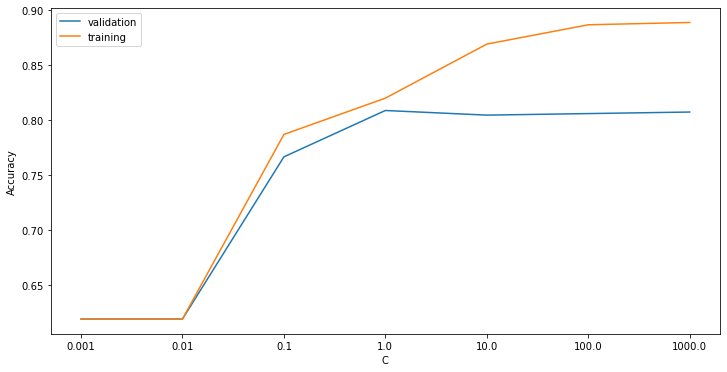

In [629]:
plt.figure(figsize=(12, 6))
validation_score = grid_search.cv_results_["mean_test_score"]
train_score = grid_search.cv_results_["mean_train_score"]
plt.plot(validation_score, label="validation")
plt.plot(train_score, label="training")
plt.xticks(np.arange(7), param_grid['C']); plt.xlabel("C"); plt.ylabel("Accuracy");plt.legend(loc='best');

## 2. Top Score - KNeighborsClassifier()

In [630]:
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# knn.predict(X_train)
# knn.score(X_train, y_train)

In [631]:
# knn.score(X_test, y_test)

In [632]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9]}
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, verbose=3, return_train_score=True)

In [633]:
grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.859, test=0.783), total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.849, test=0.768), total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.831, test=0.838), total=   0.0s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... n_neighbors=1, score=(train=0.868, test=0.725), total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.838, test=0.725), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.849, test=0.783), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.833, test=0.775), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.819, test=0.789), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.814, test=0.711), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.833, test=0.761), total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.4s finished


In [634]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 8}
0.7890180242292918


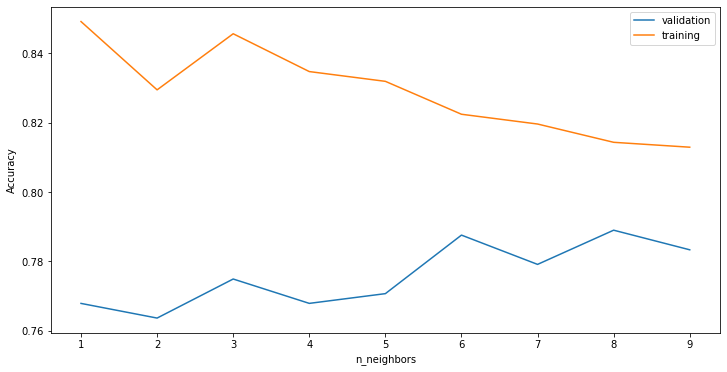

In [635]:
plt.figure(figsize=(12, 6))
validation_score = grid_search.cv_results_["mean_test_score"]
train_score = grid_search.cv_results_["mean_train_score"]
plt.plot(validation_score, label="validation")
plt.plot(train_score, label="training")
plt.xticks(np.arange(9), param_grid['n_neighbors']); plt.xlabel("n_neighbors"); plt.ylabel("Accuracy");plt.legend(loc='best');

In [636]:
from sklearn.model_selection import GridSearchCV

linreg = LogisticRegression()
param_grid = {'penalty': ['none','l1','l2','elasticnet']}
grid_search = GridSearchCV(linreg, param_grid=param_grid, cv=3, verbose=3, return_train_score=True)

In [637]:
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] penalty=none ....................................................
[CV] .... penalty=none, score=(train=0.797, test=0.785), total=   0.0s
[CV] penalty=none ....................................................
[CV] .... penalty=none, score=(train=0.791, test=0.814), total=   0.0s
[CV] penalty=none ....................................................
[CV] .... penalty=none, score=(train=0.823, test=0.789), total=   0.0s
[CV] penalty=l1 ......................................................
[CV] .......... penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] penalty=l1 ......................................................
[CV] .......... penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] penalty=l1 ......................................................
[CV] .......... penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] penalty=l2 ......................................................
[CV] ...... penal

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

In [638]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'penalty': 'none'}
0.7960618846694797


# References / Appendixes

1. https://www.kaggle.com/c/titanic/data
2. xx